In [62]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [64]:
#робимо кластеризацію методом k-середніх
model = KMeans(n_clusters=3).fit(wine.data)
predictions = model.predict(wine.data)
print(predictions)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


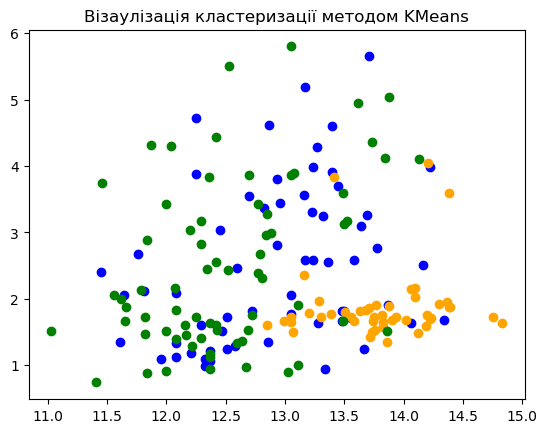

In [65]:
#візуалізуємо кластеризацію KMean
cluster_0 = wine.data[predictions == 0]
cluster_1 = wine.data[predictions == 1]
cluster_2 = wine.data[predictions == 2]
plt.scatter(cluster_0[:,0], cluster_0[:,1], color = 'blue')
plt.scatter(cluster_1[:,0], cluster_1[:,1], color = 'orange')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color = 'green')
plt.title('Візаулізація кластеризації методом KMeans')
plt.show()

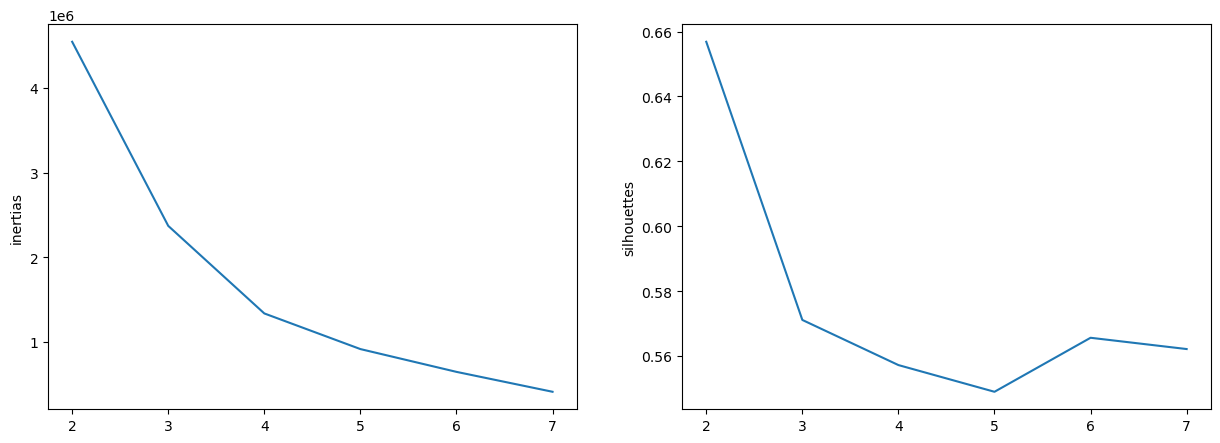

In [66]:
#Робимо перевірку на енерцію та сілуети, де згідно графіку також видно, що оптимальний варіант це 3 кластери
from sklearn.metrics import silhouette_score
inertias = []
silhouettes = []
range_values = [2, 3, 4, 5, 6, 7]
for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(wine.data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(wine.data, kmeans.labels_))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range_values, inertias)
plt.ylabel('inertias')

plt.subplot(1,2,2)
plt.plot(range_values, silhouettes)
plt.ylabel('silhouettes')

plt.show()

In [67]:
#робимо кластеризацію методом DBSCAN
dbscan = DBSCAN(eps = 0.2, min_samples=2).fit(wine.data)
pca = PCA(n_components=2).fit(wine.data)
pca_2d = pca.transform(wine.data)

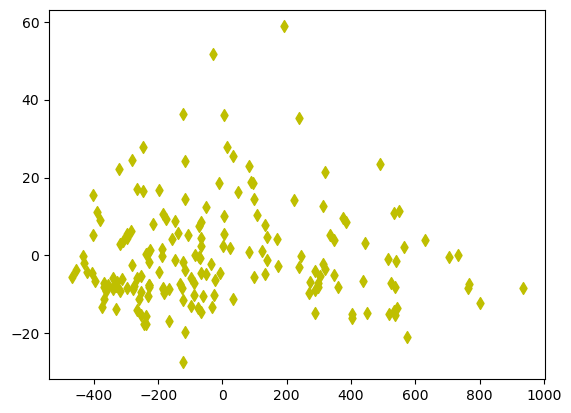

In [68]:
# візуалізуємо кластеризацію DBSCAN
for i in range (0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'b', marker='*')
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'y', marker='d')
plt.show()

In [69]:
unique_labels = np.unique(dbscan.labels_)

# Виведення кількості кластерів
num_clusters = len(unique_labels)
print("Кількість утворених кластерів: ", num_clusters)

Кількість утворених кластерів:  1


In [70]:
'''
Яке б значення не підставляли в eps та min_samples, DBSCAN все одно визначаэ тільки один кластир.
Це може свідчити про те, що метод DBSCAN саме для цього датасету не э оптимальним і багато точок 
не відповідають критеріям сусідства та не формують окремі кластери.
'''

'\nЯке б значення не підставляли в eps та min_samples, DBSCAN все одно визначаэ тільки один кластир.\nЦе може свідчити про те, що метод DBSCAN саме для цього датасету не э оптимальним і багато точок \nне відповідають критеріям сусідства та не формують окремі кластери.\n'

In [71]:
# Реалізація ієрархічної кластеризації 
from scipy.cluster.hierarchy import linkage,dendrogram
mergings = linkage(wine.data, method = 'complete')

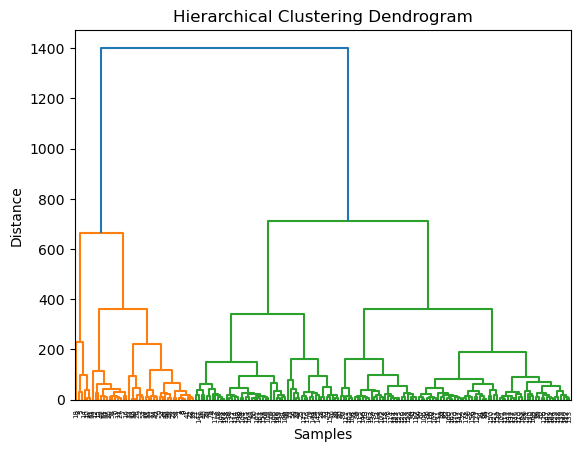

In [72]:
dendrogram(mergings, leaf_rotation = 90)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [73]:
num_clusters = 3
print("Кількість утворених кластерів: ", num_clusters)

Кількість утворених кластерів:  3
